<a href="https://colab.research.google.com/github/albertos-2002/SF3/blob/main/elettronica/esperienza_09__parmetri_caratteristici_diodo/Esperienza_9_(dati_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Stima dei parametri caratteristici del diodo

## 🟢 Dati

È stato utilizzato un reostato

Le misure di tensione e corrente sono state fatte con il metrix


In [3]:
tensione = [0.2852, 0.36366, 0.3975, 0.4356, 0.46235, 0.6056, 0.6133, 0.63115 ]  #V
corrente = [1.02, 5.02, 10.50, 24.31, 43.2, 722.5, 829.5, 1414.0]  #uA

Calcolo degli errori

- scala correnti 1000μA
- scala tensione 1000mV

In [5]:
errore_tensione = []
for i in tensione:
  dummy = 0
  dummy = math.sqrt( (0.05*i/100)**2 + (0.08)**2 )
  errore_tensione.append(dummy)
print("Errore tensione [mV]")
print(errore_tensione)

errore_corrente = []
for i in corrente:
  dummy = 0
  dummy = math.sqrt( (0.1*i/100)**2 + (0.15)**2 )
  errore_corrente.append(dummy)
print("Errore corrente [microA]")
print(errore_corrente)

Errore tensione [mV]
[0.08000012709214904, 0.08000020663816375, 0.08000024688438467, 0.08000029647970062, 0.08000033401105663, 0.0800005730469476, 0.08000058771173184, 0.08000062241995762]
Errore corrente [microA]
[0.15000346795991085, 0.15008397782574928, 0.1503670509120931, 0.15195715218442335, 0.1560968929863756, 0.737906667540008, 0.8429532905208924, 1.4219338943846864]


## 🟢 Analisi

Nelle schede ci viene chiesto di eseguire una analisi di tipo lineare e ricavare da esse i parametri di $I_s$ e $n$

### ✅ Fit con tutti i punti

Viene linearizzata la forma esponenziale della curva prendendo il logaritmo della corrente

In [10]:
errore_corrente_logaritmo = []
for i in range(len(errore_corrente)):
  dummy = 0
  dummy = errore_corrente[i]/corrente[i]
  errore_corrente_logaritmo.append(dummy)
print("Errore sul logaritmo della corrente")
print(errore_corrente_logaritmo)

Errore sul logaritmo della corrente
[0.14706222349010867, 0.029897206738197072, 0.014320671515437438, 0.006250808399194709, 0.00361335400431425, 0.0010213241073218104, 0.0010162185539733483, 0.0010056109578392407]


In [11]:
regrlin_pear_errpost_xys(tensione, np.log(corrente), errore_corrente_logaritmo)

pendenza $b$	 20.84086545150194
$\sigma_b$	 0.017650152112101927
intercetta $a$	 -5.994481144423389
$\sigma_a$	 0.010798216502052566
Coefficiente di Pearson $\rho_{xy}$	 0.9997185910067764
$\sigma_{\rho_{xy}}$	 0.009684513371234138
Errore a posteriori $\delta$	 0.0930417444725062


Grafichimo i risultati

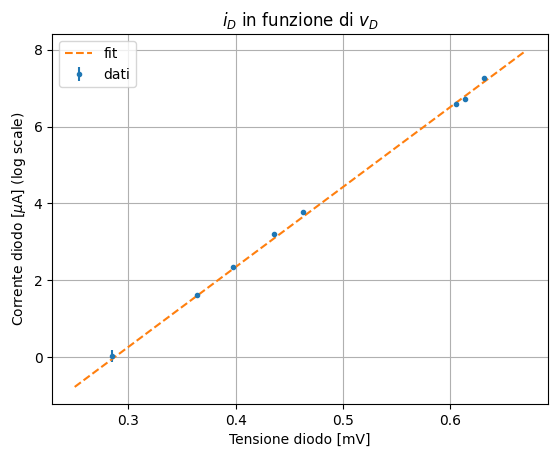

In [14]:
plt.errorbar( tensione, np.log(corrente), yerr=errore_corrente_logaritmo, marker=".", linestyle="", label="dati" )
plt.plot( np.linspace(0.25,0.67,50), retta_fit_xba( np.linspace(0.25,0.67,50) , 20.84086545150194 , -5.994481144423389 ), marker="", linestyle="--", label="fit" )
plt.title("$i_D$ in funzione di $v_D$")
plt.xlabel("Tensione diodo [mV]")
plt.ylabel("Corrente diodo [$\mu$A] (log scale)")
plt.grid()
plt.legend()

chi quadro 
 16543.49046973482
NDOF  
 6


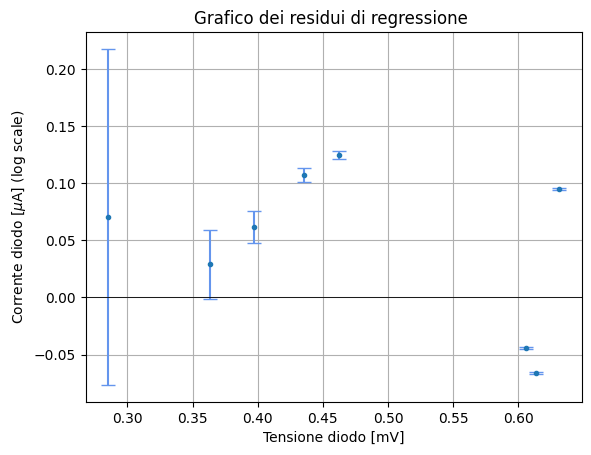

In [15]:
chi_quadro_lineare( np.log(corrente), tensione , errore_corrente_logaritmo, -5.994481144423389, 20.84086545150194, "Corrente diodo [$\mu$A] (log scale)", "Tensione diodo [mV]", "")

Possiamo vedere che la regressione e i residui non sono compatibili con la nostra ipotesi

### ❎ Fit dei dati senza il primo punto (non esattamente migliore)

Proviamo ad eliminare il primo punto data l'elevata incertezza, dovuta alla linearizzazione, in quanto la corrente è molto viciana a zero

In [17]:
regrlin_pear_errpost_xys(tensione[1:], np.log(corrente[1:]), errore_corrente_logaritmo[1:])

pendenza $b$	 20.841196592139568
$\sigma_b$	 0.01766365467696483
intercetta $a$	 -5.994684525162029
$\sigma_a$	 0.010806541920635916
Coefficiente di Pearson $\rho_{xy}$	 0.9995760440221867
$\sigma_{\rho_{xy}}$	 0.01302100009181663
Errore a posteriori $\delta$	 0.09696619709658127


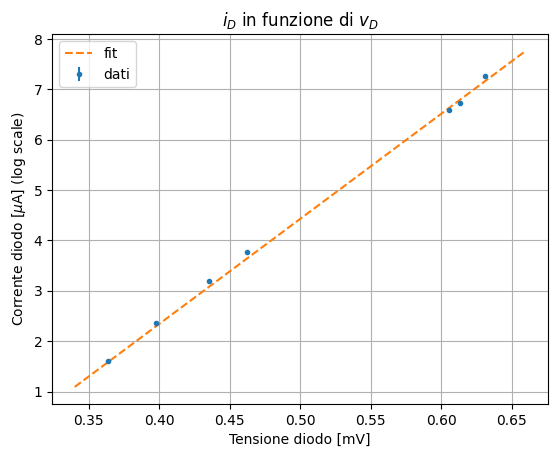

In [20]:
plt.errorbar( tensione[1:], np.log(corrente[1:]), yerr=errore_corrente_logaritmo[1:], marker=".", linestyle="", label="dati")
plt.plot( np.linspace(0.34,0.66,40), retta_fit_xba( np.linspace(0.34,0.66,40) , 20.841196592139568 , -5.994684525162029 ), marker="", linestyle="--", label="fit" )
plt.title("$i_D$ in funzione di $v_D$")
plt.xlabel("Tensione diodo [mV]")
plt.ylabel("Corrente diodo [$\mu$A] (log scale)")
plt.grid()
plt.legend()

chi quadro 
 16543.26050346018
NDOF  
 5


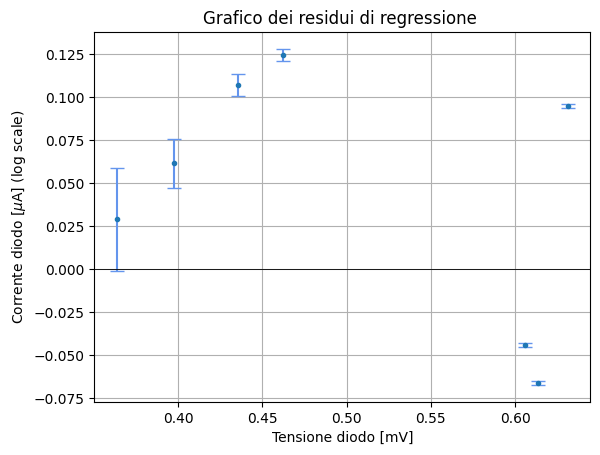

In [21]:
chi_quadro_lineare( np.log(corrente[1:]), tensione[1:] , errore_corrente_logaritmo[1:], -5.994684525162029, 20.841196592139568, "Corrente diodo [$\mu$A] (log scale)", "Tensione diodo [mV]", "")

### ❎ Fit di tipo esponenziale

In [25]:
def funzione_esponenziale(x, i_s, n, v_t):
  return i_s*( math.e**( x / (n*v_t) ) )

param, matrixcov = curve_fit( funzione_esponenziale, tensione, corrente, sigma=errore_corrente)

print("parametri di regressione i_s, n, v_t")
print(param)
print("matrice di covarianza")
print(matrixcov)

parametri di regressione i_s, n, v_t
[ 0.00242917 -0.21722591 -0.22057982]
matrice di covarianza
[[ 1.67069233e-04  1.04730182e+05 -1.06347187e+05]
 [ 1.04730182e+05  6.67518646e+13 -6.77824945e+13]
 [-1.06347187e+05 -6.77824945e+13  6.88290370e+13]]


i parametri che vengono restituiti non concidono con i concetti teorici per quanto riguarda i parametri dei diodi, n deve esere almeno uguale a 1

conseguentemente scartiamo questo metodo

inoltre gli errori riportati non sono esattamente sensati

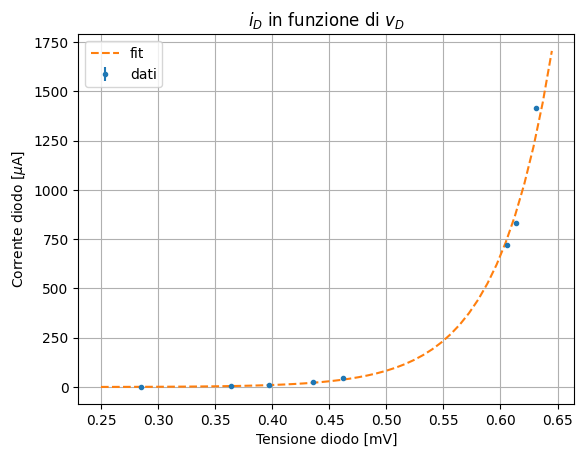

In [31]:
plt.errorbar( tensione, corrente, yerr=errore_corrente, marker=".", linestyle="", label="dati" )
plt.plot( np.linspace(0.25,0.645,50), funzione_esponenziale(np.linspace(0.25,0.645,50), 0.00242917, -0.21722591, -0.22057982), marker="", linestyle="--", label="fit" )
plt.title("$i_D$ in funzione di $v_D$")
plt.xlabel("Tensione diodo [mV]")
plt.ylabel("Corrente diodo [$\mu$A]")
plt.grid()
plt.legend()

### ✅ Calcolo dei parametri che caratterizzano il diodo

◀ Dal valore dell'intercetta ricaviamo il valore sperimentale di $I_s$

In [32]:
i_s = math.e**(-5.994481144423389) #l'unita di misura sarà micro ampere
err_i_s = i_s*0.010798216502052566
print(i_s, " \pm ", err_i_s)

0.002492469870106553  \pm  2.6914229282253394e-05


Una corrente di saturazione di 2.5 nano ampere è leggermente altina ma abbastanza accettabile

◀ Calcoliamo il valore di $n* V_t$ dal coefficiente angolare della retta

In [33]:
n_vt = 1/20.84086545150194
err_n_vt = n_vt*0.017650152112101927/20.84086545150194
print(n_vt, " \pm ", err_n_vt)

0.04798265227166624  \pm  4.063656153377107e-05


Se assumiamo che (riportato nelle slide di teoria) che la tensione termica sia pari a circa 26$mV$ nelle nostre condizioni sperimentali (circa 300$K$)

In [34]:
fattore_idealita = n_vt / 0.026
print(fattore_idealita)

1.845486625833317


che rientra (per poco) nei limiti teorici presentati a lezione

#Librerie

In [6]:
def regrlin_pear_errpost_xys(input_x, input_y, input_sigma) :
  import math
  import sys
  #dati input
  x = list(input_x)
  y = list(input_y)
  sigma = list(input_sigma)
  dimensione = len(x)
  if len(x) != len(y):
    print("X E Y DIMENSIONE DIVERSA")
    sys.exit()
  if len(x) != len(sigma):
    print("X E SIGMA DIMENSIONE DIVERSA")
    sys.exit()
  #REGRESSIOBNE LINEARE
  #calcolo del delta
  parametro_1 = 0
  parametro_2 = 0
  parametro_3 = 0
  for i in range(dimensione): #primo termine del delta
    dummy_1 = 0
    dummy_1 = 1/ pow(sigma[i],2)
    parametro_1 = dummy_1 + parametro_1
  for i in range(dimensione): #secondo termine del delta
    dummy_2 = 0
    dummy_2 = pow(x[i],2) / pow(sigma[i],2)
    parametro_2 = dummy_2 + parametro_2
  dummy_3_1 = 0
  for i in range(dimensione): #terzo termine del delta
    dummy_3 = 0
    dummy_3 = x[i] / pow(sigma[i],2)
    dummy_3_1 = dummy_3 + dummy_3_1
  parametro_3 = pow(dummy_3_1,2)
  delta = (parametro_1*parametro_2) - parametro_3
  delta_1 = 1/delta
  #calcolo di b
  parametro_4 = 0
  parametro_5 = 0
  parametro_6 = 0
  parametro_7 = 0
  for i in range(dimensione): #calcolo del primo termine di a
    dummy_4 = 0
    dummy_4 = 1/pow(sigma[i],2)
    parametro_4 = dummy_4 + parametro_4
  for i in range(dimensione): #calcolo del secondo termine di a
    dummy_5 = 0
    dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
    parametro_5 = dummy_5 + parametro_5
  for i in range(dimensione): #calcolo del terzo termine di a
    dummy_6 = 0
    dummy_6 = x[i] / pow(sigma[i],2)
    parametro_6 = dummy_6 + parametro_6
  for i in range(dimensione): #calcolo del quarto termine di a
    dummy_7 = 0
    dummy_7 = y[i] / pow(sigma[i],2)
    parametro_7 = dummy_7 + parametro_7
  dummy_b1 = delta_1*parametro_4*parametro_5
  dummy_b2 = delta_1*parametro_6*parametro_7
  b = dummy_b1-dummy_b2
	#calcolo di a
  parametro_8 = parametro_2
  parametro_9 = parametro_7
  parametro_10 = parametro_6
  parametro_11 = parametro_5
  dummy_a1 = delta_1*parametro_8*parametro_9
  dummy_a2 = delta_1*parametro_10*parametro_11
  a = dummy_a1-dummy_a2
  #calcolo incertezza e covarianza
  #sigma b
  sigma_b = math.sqrt(delta_1*parametro_1)
  #sigma a
  sigma_a = math.sqrt(delta_1*parametro_8)
  #covrianza
  #al mmento non disponibile
  #COEFFICIENTE DI CORRELLAZIONE DI PEARSON
  media_x = sum(x) / dimensione
  media_y = sum(y) / dimensione
  numeratore = 0
  denominatore = 0
  dummy_denx = 0
  dummy_deny = 0
  for i in range(dimensione):
    dummy_x = x[i]-media_x
    dummy_y = y[i]-media_y
    dummy_numeratore = dummy_x*dummy_y
    numeratore = dummy_numeratore + numeratore
    dummy_x2 = pow(dummy_x,2)
    dummy_y2 = pow(dummy_y,2)
    dummy_denx = dummy_x2 + dummy_denx
    dummy_deny = dummy_y2 + dummy_deny
  dummy_denominatore = dummy_denx * dummy_deny
  denominatore = math.sqrt(dummy_denominatore)
  rxy = numeratore / denominatore
  numeratore_sigma = 1 - pow(rxy,2)
  denominatore_sigma = dimensione - 2
  sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)
  #ERRORE A POSTERIORI
  parametro_12 = 1 / (dimensione - 2)
  y_riferimento = []
  for i in range(dimensione):
    dummy_y = 0
    dummy_y = a + (b*x[i])
    y_riferimento.append(dummy_y)
  scarti_quadrati = 0
  for i in range(dimensione):
    dummy_sq = y[i] - y_riferimento[i]
    dummy_sq2 = pow(dummy_sq,2)
    scarti_quadrati = dummy_sq2 + scarti_quadrati
  errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)
  #print dei risultati
  print("pendenza $b$\t", b)
  print("$\sigma_b$\t", sigma_b)
  print("intercetta $a$\t", a)
  print("$\sigma_a$\t", sigma_a)
  #print("covarianza", )
  print("Coefficiente di Pearson $\\rho_{xy}$\t",  rxy)
  print("$\sigma_{\\rho_{xy}}$\t", sigma_rxy)
  print("Errore a posteriori $\delta$\t",  errore_posteriori)

In [7]:
def retta_fit_xba(x, b,a):
  y = []
  for i in range(len(x)):
    dummy = 0
    dummy = (x[i]*b) + a
    y.append(dummy)
  return y

def retta_fit_xa(x, a):
  y = []
  for i in range(len(x)):
    dummy = 0
    dummy = (x[i]*0) + a
    y.append(dummy)
  return y

In [9]:
def chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle, stringa_xtitle, stringa_titolo):

	import math
	import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
	y = list(y_vec)
	x = list(x_vec)
	sigma = list(sigma_vec)
	intercetta = inte
	pendenza = pend
	dimensione = len(y)

#calcolo del riferimento
	y_ref = []
	for i in x:
		dummy_1 = 0
		dummy_1 = (i*pendenza) + intercetta
		y_ref.append(dummy_1)

#calcolo del chi quadro
	vettore_scarti_quadratici = []
	vettore_scarti = []
	for i in range(dimensione):
		dummy_2 = 0
		dummy_3 = 0
		dummy_4 = 0
		dummy_2 = y[i] - y_ref[i]
		dummy_3 = dummy_2 / sigma[i]
		dummy_4 = dummy_3**2
		vettore_scarti_quadratici.append(dummy_4)
		vettore_scarti.append(dummy_2)

	chi_quadro = sum(vettore_scarti_quadratici)
	print("chi quadro \n", chi_quadro)
	print("NDOF  \n", dimensione-2)

#print del grafico degli scarti
	ascisse = x

	plt.errorbar(ascisse, vettore_scarti, marker=".", linestyle="none", yerr=sigma, ecolor="cornflowerblue", capsize=5)
	plt.title("Grafico dei residui di regressione " + stringa_titolo )
	plt.ylabel(stringa_ytitle)
	plt.xlabel(stringa_xtitle)
	plt.axhline(0, color='black', linewidth="0.6")
	plt.grid()